# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

открываем файл и сразу рассматриваем общую иноформацию о данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
#print(data.head(10))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
display(data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


рассмотрим каждый из столбцов и в цеом что представляет из себя каждый из столбцов

In [4]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


выводим статистические значения и сразу видем несколько аномальных значений такие как высота потолка 

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

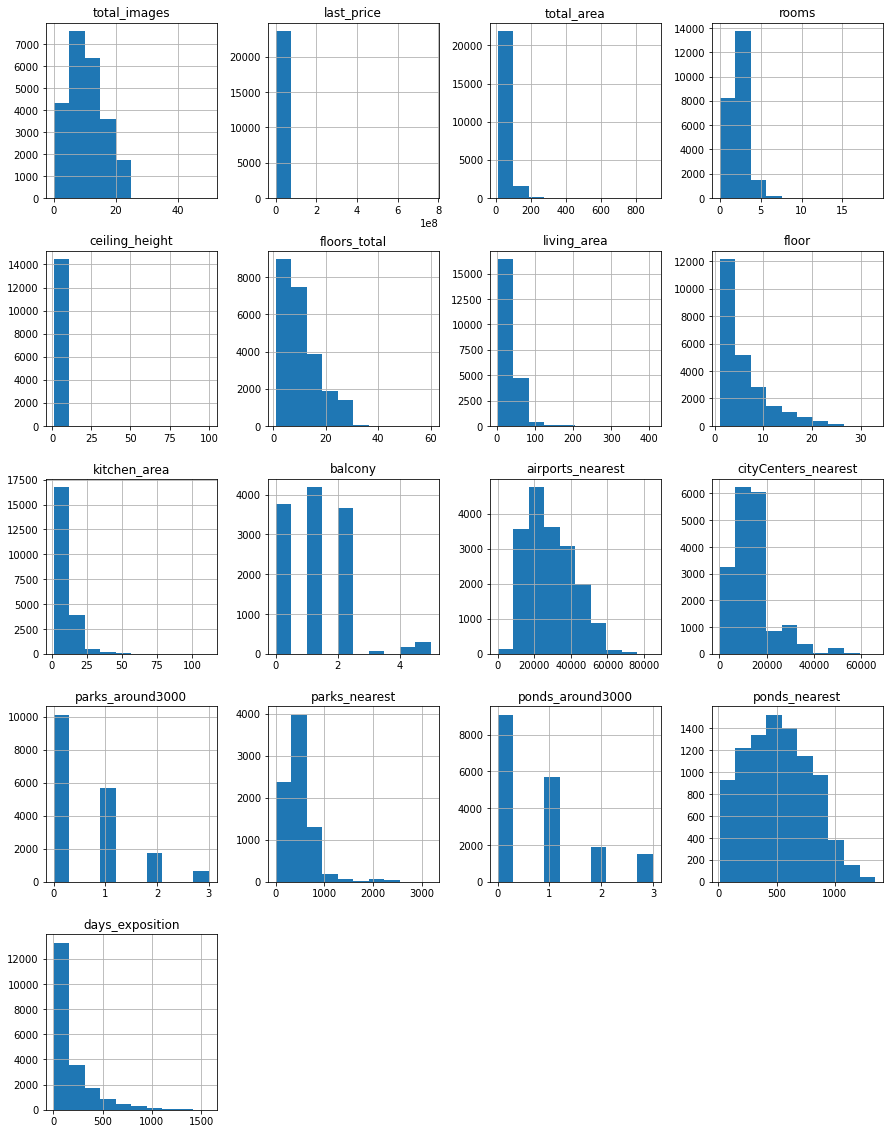

In [5]:
data.hist(figsize=(15, 20))

По некоторым колонкам сложно делать какой либо вывод так как там содержиться только одна колонка так как скорее всего очень много нулевых значений или у остальных слишком низкие значения, но также можем заметить и информативные графики такие как : cityCenter_nearest, ponds_nearest

### Предобработка данных

Рассмотрим кол-во ячеек в которых нет данных 

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Заполняет путсые значения в столбце floots_total нулем а также столбец bacony 

In [7]:
#data['floors_total'] = data['floors_total'].dropna()
data['balcony'] = data['balcony'].fillna(value = 0)
data['balcony'] =data['balcony'].astype(int)
display(data)
print(data['balcony'])
print(data['floors_total'].isna().sum())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


0        0
1        2
2        0
3        0
4        0
        ..
23694    0
23695    0
23696    0
23697    2
23698    0
Name: balcony, Length: 23699, dtype: int64
86


Также меняем тип данных столбца days_exposition на int так как с ним делать матем расчеты легче 

In [8]:
data['days_exposition'] = np.floor(pd.to_numeric(data['days_exposition'], errors='coerce')).astype('Int64')
#data['days_exposition'] = data['days_exposition'].astype(int)
print(data['days_exposition'].head(10))

0    <NA>
1      81
2     558
3     424
4     121
5      55
6     155
7    <NA>
8     189
9     289
Name: days_exposition, dtype: Int64


делаем все тоже самое так как мы будем делить категории этажи а для этого нам нужно делать сравнения с одинаковыми типами данных

In [9]:
data['locality_name'].unique()
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['госелок ', 'городской поселок ', 'деревня ', 'поселок городского типа ', 'село ', 'городской ', 'поселок ', 'при железнодорожной станции '], '', regex=True)
) 
print(len(data['locality_name'].unique()))

312


меняем тип данных object на datetime

In [10]:
#print(data.head(10))
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S'
)
print(data['first_day_exposition'].head(10))

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
5   2018-09-10
6   2017-11-02
7   2019-04-18
8   2018-05-23
9   2017-02-26
Name: first_day_exposition, dtype: datetime64[ns]


здесь мы приобразовали данные во время и так же убрали часы и минуты так как везде стояли нули

### Посчитайте и добавьте в таблицу новые столбцы

Здесь мы расчитывает цену каждой из недвижимости за квадратный метер 

In [11]:
data['price_meter'] = (data['last_price'] / data['total_area']).round()
print(data['price_meter'])

0        120370.0
1         82921.0
2         92786.0
3        408176.0
4        100000.0
           ...   
23694     72491.0
23695     52542.0
23696     44092.0
23697    149511.0
23698     41796.0
Name: price_meter, Length: 23699, dtype: float64


Здесь мы создаем новые столбцы которые показывают день недели, месяц и год публикации недвижимости 

In [12]:
data['week_num'] = data['first_day_exposition'].dt.weekday
#data['month_num'] = pd.datetimeIndex(data['first_day_exposition']).month
data['month_num'] = data['first_day_exposition'].dt.month
data['year_num'] = data['first_day_exposition'].dt.year
print(data['first_day_exposition'].head(5))
print(data['week_num'].head(5))
print(data['month_num'].head(5))
print(data['year_num'].head(5))

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]
0    3
1    1
2    3
3    4
4    1
Name: week_num, dtype: int64
0     3
1    12
2     8
3     7
4     6
Name: month_num, dtype: int64
0    2019
1    2018
2    2015
3    2015
4    2018
Name: year_num, dtype: int64


Здесь мы создаем функцию которая будет делить этажи на три категории "первый", "последний", "другой"

In [13]:
def floor_type(row):
    if row['floor'] == 1:
         return "первый"
    elif row['floor'] == row['floors_total']:
         return "последний"
    else:
         return "другой"

In [14]:
data['floor_type'] = data.apply(floor_type,axis = 1)
print(data['floor_type'].head())

0    другой
1    первый
2    другой
3    другой
4    другой
Name: floor_type, dtype: object


меняем расстояние с метров на километры

In [15]:
data['cityCenters_nearest'] = (data['cityCenters_nearest'] / 1000).round()
#data['cityCenters_nearest'].dropna()

In [16]:
print(data['cityCenters_nearest'].max())

66.0


### Проведите исследовательский анализ данных

Здесь мы создали цикл который берет аномально высокие потолки и делит их на 10 чтобы сделать их нормальными

In [17]:
#1
for value in data['ceiling_height']:
     if value >= 6:
        data['ceiling_height'] = data['ceiling_height'].replace({value: value/10})

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,week_num,month_num,year_num,floor_type
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,1.0,482.0,2.0,755.0,<NA>,120370.0,3,3,2019,другой
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,0.0,NaN,0.0,NaN,81,82921.0,1,12,2018,первый
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,1.0,90.0,2.0,574.0,558,92786.0,3,8,2015,другой
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,2.0,84.0,3.0,234.0,424,408176.0,4,7,2015,другой
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,2.0,112.0,1.0,48.0,121,100000.0,1,6,2018,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,...,1.0,796.0,3.0,381.0,<NA>,72491.0,1,3,2017,другой
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,NaN,...,NaN,NaN,NaN,NaN,45,52542.0,0,1,2018,другой
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,NaN,NaN,<NA>,44092.0,6,2,2018,первый
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,NaN,...,2.0,173.0,3.0,196.0,602,149511.0,1,3,2017,другой


<AxesSubplot:>

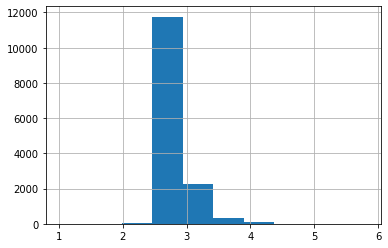

In [18]:
data_ceiling_height = data.query('ceiling_height > 1 & ceiling_height < 10')
display(data)
data_ceiling_height['ceiling_height'].hist()

Средняя высота потолка составляет от 2.3 до 4 метров и это особо не связанно с общей площадью помещения

<AxesSubplot:>

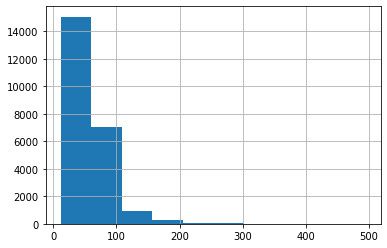

In [19]:
data['last_price'] = data['last_price'].astype(int)
m = data['last_price'].median()
data_last_price = data.query('last_price > 800000 & last_price < 50000000')
data['last_price'] = data['last_price'].fillna(m)
#data.plot(kind = 'scatter', x='total_area', y='last_price', grid = True)
data_last_price['total_area'].hist()

в среднем площадь квартиры состоявляет от 20 до 105 кв метров

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,week_num,month_num,year_num,floor_type
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,1.0,482.0,2.0,755.0,<NA>,120370.0,3,3,2019,другой
1,7,3350000,40.40,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,0.0,NaN,0.0,NaN,81,82921.0,1,12,2018,первый
2,10,5196000,56.00,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,1.0,90.0,2.0,574.0,558,92786.0,3,8,2015,другой
3,0,64900000,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,2.0,84.0,3.0,234.0,424,408176.0,4,7,2015,другой
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,2.0,112.0,1.0,48.0,121,100000.0,1,6,2018,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,...,1.0,796.0,3.0,381.0,<NA>,72491.0,1,3,2017,другой
23695,14,3100000,59.00,2018-01-15,3,NaN,5.0,38.0,4,NaN,...,NaN,NaN,NaN,NaN,45,52542.0,0,1,2018,другой
23696,18,2500000,56.70,2018-02-11,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,NaN,NaN,<NA>,44092.0,6,2,2018,первый
23697,13,11475000,76.75,2017-03-28,2,3.00,17.0,NaN,12,NaN,...,2.0,173.0,3.0,196.0,602,149511.0,1,3,2017,другой


<AxesSubplot:>

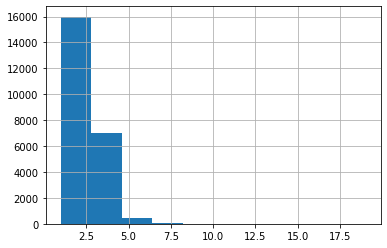

In [20]:
clean_rooms = data.query('rooms > 0')
#clean_rooms.plot(kind = 'scatter', x='rooms', y='last_price', grid = True)
display(data)
clean_rooms['rooms'].hist()

Здесь тяжело делать какие либо выводы поэтому лучше всего построить сводную таблицу и сделать вывод по ней

       last_price
rooms            
1         3600000
2         4770169
3         6200000
4         9000000
5        14000000
6        19000000
7        24900000
8        23095000
9        23750000
10       23000000
11       25250000
12      420000000
14       26829500
15       65000000
16       28500000
19       32250000


<AxesSubplot:>

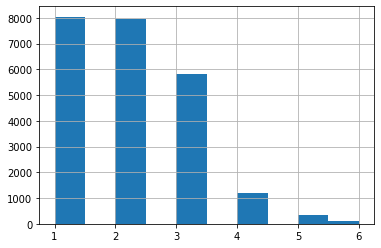

In [21]:
gg = clean_rooms.pivot_table(index = 'rooms', values = 'last_price', aggfunc = 'median')
data = data.query('rooms < 7 & rooms > 0')
print(gg)
data['rooms'].hist()

count    2.341200e+04
mean     6.395420e+06
std      8.773774e+06
min      1.219000e+04
25%      3.450000e+06
50%      4.650000e+06
75%      6.755720e+06
max      4.013000e+08
Name: last_price, dtype: float64


<AxesSubplot:>

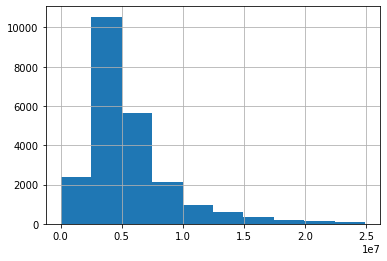

In [22]:
print(data['last_price'].describe())
data = data.query('last_price < 25000000')
data['last_price'].hist()

Начниная от 1 комнаты до 7 цена ростет что и следоволо ожидать но если посмотрим на недвижимости у которых комнат больше 7 то цены очень сильно вариируются из чего можем сделать вывод что свыше 7 комнат уже играю другие факторы которые составляют цену

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,week_num,month_num,year_num,floor_type
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,1.0,482.0,2.0,755.0,<NA>,120370.0,3,3,2019,другой
1,7,3350000,40.40,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,0.0,NaN,0.0,NaN,81,82921.0,1,12,2018,первый
2,10,5196000,56.00,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,1.0,90.0,2.0,574.0,558,92786.0,3,8,2015,другой
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,2.0,112.0,1.0,48.0,121,100000.0,1,6,2018,другой
5,10,2890000,30.40,2018-09-10,1,NaN,12.0,14.4,5,NaN,...,NaN,NaN,NaN,NaN,55,95066.0,0,9,2018,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,...,1.0,796.0,3.0,381.0,<NA>,72491.0,1,3,2017,другой
23695,14,3100000,59.00,2018-01-15,3,NaN,5.0,38.0,4,NaN,...,NaN,NaN,NaN,NaN,45,52542.0,0,1,2018,другой
23696,18,2500000,56.70,2018-02-11,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,NaN,NaN,<NA>,44092.0,6,2,2018,первый
23697,13,11475000,76.75,2017-03-28,2,3.00,17.0,NaN,12,NaN,...,2.0,173.0,3.0,196.0,602,149511.0,1,3,2017,другой


<AxesSubplot:>

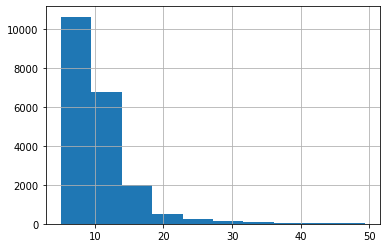

In [23]:
kitchen_clean = data.query('kitchen_area > 5 & kitchen_area < 50 & last_price < 170000000')
#data = data.query('kitchen_area < 50')
display(data)
#kitchen_clean.plot(kind = 'scatter', x='kitchen_area', y='last_price', grid = True)
#kitchen_clean.plot(kind = 'scatter', x='kitchen_area', y='total_area', grid = True)
kitchen_clean['kitchen_area'].hist()

Можем видеть кореляцию площади кухни с площадью всей квартиры а также с ценой квартиры, значит можем сказать что площадь кухни зависит на цену

<AxesSubplot:>

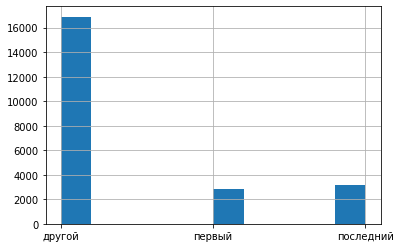

In [24]:
#data.plot(kind = 'scatter', x='floor_type', y='last_price', grid = True)
data.pivot_table(index = 'floor_type', values='last_price', aggfunc = {'median', 'mean', 'max', 'min'})
data['floor_type'].hist()

Последний этаж оказался самым дорогим ,на втором месте стоит квартиры которые находяться на первом этаже и остальные 

<AxesSubplot:>

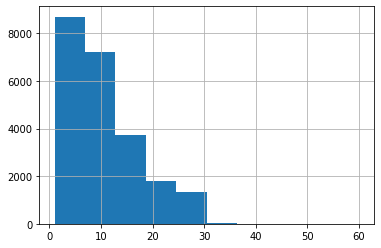

In [25]:
data_floors = data.query('last_price > 5000000')
#data.plot(kind = 'scatter', x='floors_total', y='last_price', grid = True)
#print(data['last_price'].head(10))
data['floors_total'].hist()

Можем увидеть что цена за дома в которых от 3 до 9 этажей цена выше чем у остальных

In [26]:
ss = data.pivot_table(index = 'studio', values='last_price', aggfunc = 'median')
print(ss)

        last_price
studio            
False      4600000
True       2650000


<AxesSubplot:>

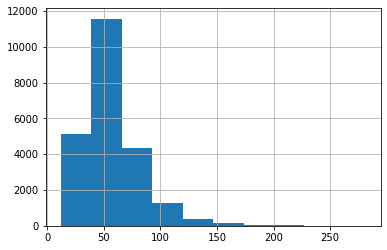

In [27]:
data_total_area = data.query('total_area > 5 & total_area < 300')
data = data.query('total_area < 200')
data_total_area['total_area'].hist()

средняя площадь квартиры равна 50 кв метрам 

<AxesSubplot:>

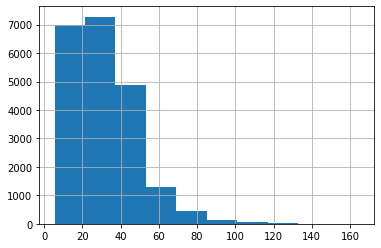

In [28]:
data_total_area = data.query('living_area > 5 & living_area < 200')
data_total_area['living_area'].hist()

в то время как жилая площадь квартиры равна 30-40 кв метрам 

<AxesSubplot:>

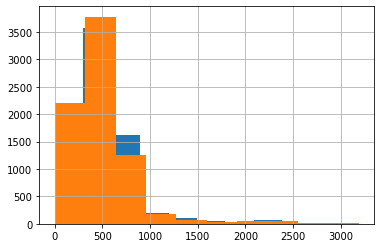

In [29]:
data_parks_nearest = data.query('parks_nearest < 3000')
data_parks_nearest['parks_nearest'].hist()
data['parks_nearest'].hist()

Среднее расстояние до ближайшего парка равно 500 метрам 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,week_num,month_num,year_num,floor_type
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,1.0,482.0,2.0,755.0,<NA>,120370.0,3,3,2019,другой
1,7,3350000,40.40,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,0.0,NaN,0.0,NaN,81,82921.0,1,12,2018,первый
2,10,5196000,56.00,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,1.0,90.0,2.0,574.0,558,92786.0,3,8,2015,другой
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,2.0,112.0,1.0,48.0,121,100000.0,1,6,2018,другой
5,10,2890000,30.40,2018-09-10,1,NaN,12.0,14.4,5,NaN,...,NaN,NaN,NaN,NaN,55,95066.0,0,9,2018,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,...,1.0,796.0,3.0,381.0,<NA>,72491.0,1,3,2017,другой
23695,14,3100000,59.00,2018-01-15,3,NaN,5.0,38.0,4,NaN,...,NaN,NaN,NaN,NaN,45,52542.0,0,1,2018,другой
23696,18,2500000,56.70,2018-02-11,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,NaN,NaN,<NA>,44092.0,6,2,2018,первый
23697,13,11475000,76.75,2017-03-28,2,3.00,17.0,NaN,12,NaN,...,2.0,173.0,3.0,196.0,602,149511.0,1,3,2017,другой


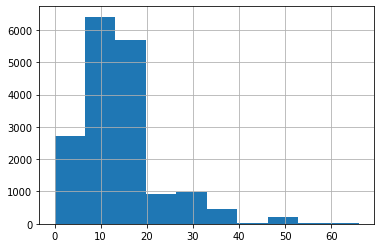

In [30]:
data_cityCenters_nearest = data.query('cityCenters_nearest < 70')
data_cityCenters_nearest['cityCenters_nearest'].hist()
display(data)

У большей части квартир расстояние до центра города от 1 до 20 км и также есть не большой скочек на 50 км от центра

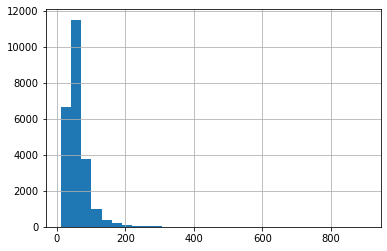

In [31]:
#код ревьюера
data2 = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
(data2['total_area']).hist(bins=30);

AxesSubplot(0.125,0.125;0.775x0.755)


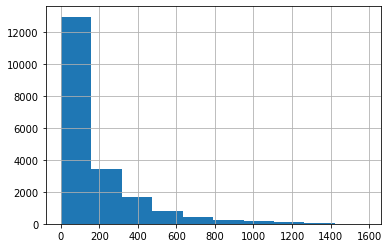

In [32]:
#2
print(data['days_exposition'].hist())

Тяжело делать какие то выводы так как очень много квартир у которых объявление висело 0 дней поэтому уберем значения где days_exposition
равен 0 и также уберем квартиры которые уже весят больше года в объявлении (365)

AxesSubplot(0.125,0.125;0.775x0.755)
count    17011.000000
mean       104.810476
std         89.614513
min          1.000000
25%         37.000000
50%         74.000000
75%        154.000000
max        365.000000
Name: days_exposition, dtype: float64
count    19910.000000
mean       178.927524
std        217.127771
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64


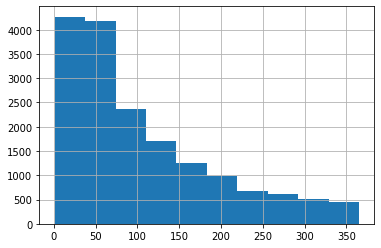

In [33]:
days_exp_data = data.query('days_exposition > 0 & days_exposition < 366')
print(days_exp_data['days_exposition'].hist())
print(days_exp_data['days_exposition'].describe())
print(data['days_exposition'].describe())

За счет того что мы сократили зачения до 365 дней наше стандартное отклонение понизилось на чуть больше чем в два раза но при этом медиана сохраниась что не можем сказать о срднем значении
вывод: срдней срок сколько дней объявление висит на сайте составляет 74 дня и среднем 104 дня

Средная цена по общей площади квартиры 7551700.706639526
Медианая цена по общей площади квартиры 5695705.0
Корреляция 0.7795727845468466


<AxesSubplot:xlabel='total_area', ylabel='last_price'>

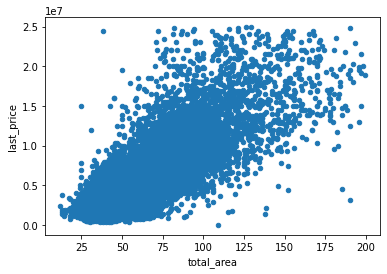

In [34]:
#3
total_area_data = data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = {'mean', 'median'})
#print(total_area)
mean_total_area = total_area_data['mean'].mean()
median_total_area = total_area_data['median'].median()
corr_total_area_data = data['last_price'].corr(data['total_area'])
print(f'Средная цена по общей площади квартиры {mean_total_area}')
print(f'Медианая цена по общей площади квартиры {median_total_area}')
print(f'Корреляция {corr_total_area_data}')
data.plot(x='total_area', y='last_price', kind = 'scatter')

Здесь мы видем достаточно сильную корреляцию между ценой и площадью квартиры и также разницу между медианой и срездним что говорит нам о том что у нас очень много данных которые сильно отличаются от среднего 

7670027.104557436
5935346.0
Корреляция 0.6637853239768274


<AxesSubplot:xlabel='living_area', ylabel='last_price'>

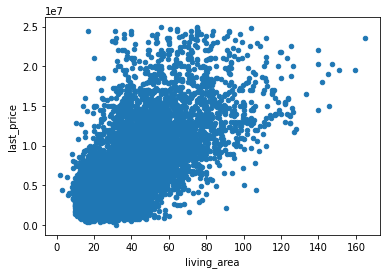

In [35]:
living_area_data = data.pivot_table(index = 'living_area', values = 'last_price', aggfunc = {'mean', 'median'})
#print(total_area)
mean_living_area = living_area_data['mean'].mean()
median_living_area = living_area_data['median'].median()
corr_living_area_data = data['last_price'].corr(data['living_area'])
print(mean_living_area)
print(median_living_area)
print(f'Корреляция {corr_living_area_data}')
data.plot(x='living_area', y='last_price', kind = 'scatter')


здесь корреляцию уже слабее но при этом она больше 50% и видна сильная разница между медианой и средним

10.18821295321917
9.0
Корреляция 0.5910669304436281


<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

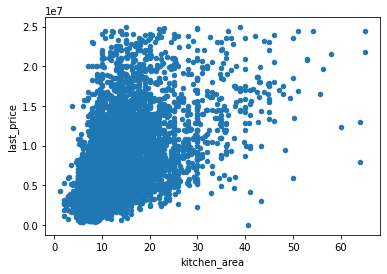

In [36]:
mean_kitchen_area = data['kitchen_area'].mean()
median_kitchen_area = data['kitchen_area'].median()
corr_kitchen = data['last_price'].corr(data['kitchen_area'])
print(mean_kitchen_area)
print(median_kitchen_area)
print(f'Корреляция {corr_kitchen}')
data.plot(x='kitchen_area', y='last_price', kind = 'scatter')

что касается площади кухни то тут все лучше так как медиана и среднее не сильно отличаются друг от друга а корреляция также положительна и выше 50%

2.027134319242682
2.0
Корреляция 0.49194361911838463


<AxesSubplot:xlabel='rooms'>

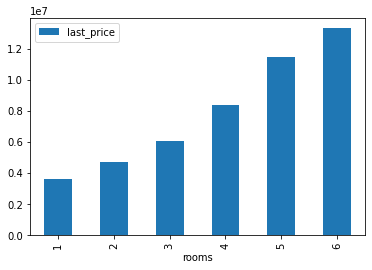

In [37]:
mean_rooms = data['rooms'].mean()
median_rooms = data['rooms'].median()
corr_rooms = data['last_price'].corr(data['rooms'])
print(mean_rooms)
print(median_rooms)
print(f'Корреляция {corr_rooms}')
#data.plot(x='rooms', y='last_price', kind = 'scatter')
rooms_data = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = 'median')
rooms_data.plot.bar()

здесь уже можно сказать что медиана и среднее одинаковые но при этом корреляция ниже 50% что говорит о том что связь между ценой и комнатами слабая 

5550176.598541542
4600000.0
Корреляция 0.002722990773831758


<AxesSubplot:xlabel='month_num'>

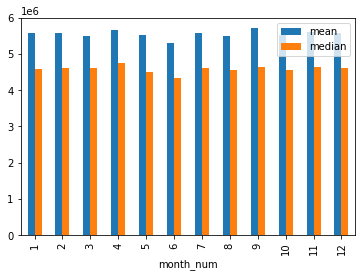

In [38]:
month_num_data = data.pivot_table(index = 'month_num', values = 'last_price', aggfunc = {'mean', 'median'})
#print(week_num_data)
corr_month_num = data['last_price'].corr(data['month_num'])
print(month_num_data['mean'].mean())
print(month_num_data['median'].median())
print(f'Корреляция {corr_month_num}')
#data.plot(x='month_num', y='last_price', kind = 'scatter')
month_num_data.plot.bar()

что касатается дня недели то тут нет никакой связи с ценой а средняя и медиана не сильно отличаются 

6211219.269648164
4772000.0
Корреляция -0.0280952775977662


<AxesSubplot:xlabel='year_num'>

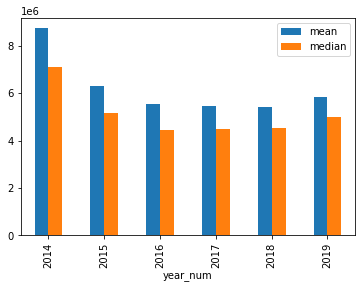

In [39]:
year_num_data = data.pivot_table(index = 'year_num', values = 'last_price', aggfunc = {'mean', 'median'})
#print(week_num_data)
corr_year_num = data['last_price'].corr(data['year_num'])
print(year_num_data['mean'].mean())
print(year_num_data['median'].median())
print(f'Корреляция {corr_year_num}')
#data.plot(x='year_num', y='last_price', kind = 'scatter')
year_num_data.plot.bar()

года слегка влияют на цены мы можем видеть что корреляция отрицательная что очень странно

5526255.069087105
4600000.0
Корреляция -0.015726276270824072


<AxesSubplot:xlabel='week_num'>

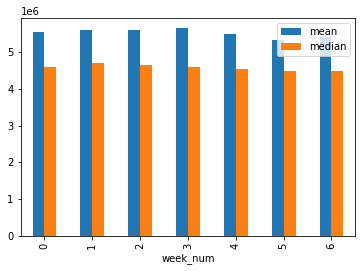

In [40]:
week_num_data = data.pivot_table(index = 'week_num', values = 'last_price', aggfunc = {'mean', 'median'})
#print(week_num_data)
corr_week_num = data['last_price'].corr(data['week_num'])
print(week_num_data['mean'].mean())
print(week_num_data['median'].median())
print(f'Корреляция {corr_week_num}')
#data.plot(x='week_num', y='last_price', kind = 'scatter')
week_num_data.plot.bar()

что касается недели то тут достаточно сильная разница между медианой и средним а корреляция очень слабая 

            last_price
floor_type            
другой         4800000
первый         3900000
последний      4200000


<AxesSubplot:xlabel='floor_type'>

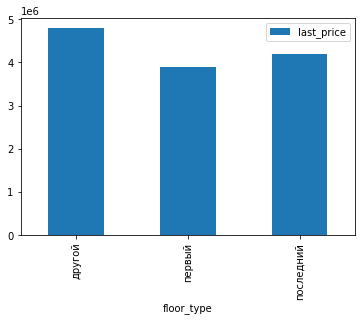

In [41]:
floor_type_data = data.pivot_table(index = 'floor_type', values = 'last_price', aggfunc = 'median')
print(floor_type_data)
floor_type_data.plot.bar()

Можем заметить слабую разницу между тремя категориями. Меньше всего квартиркоторые расположены на первом этаже дальше идет послдений этаж и логично что больше всего квартир из категории другие так как это все остальные квартиры 

                 count    median
locality_name                   
Санкт-Петербург  15051  103804.0
Пушкин             361   99744.0
Кудрово            451   95349.0
Парголово          322   91984.5
Мурино             562   84801.5
Шушары             436   76748.0
Колпино            337   74722.0
Гатчина            307   67797.0
Всеволожск         392   65789.0
Выборг             237   58158.0


<AxesSubplot:xlabel='locality_name'>

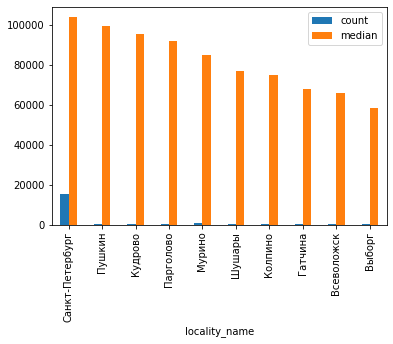

In [42]:
#4
bb = data.groupby('locality_name')['locality_name'].count()
aa = bb.sort_values(ascending = False).head(10)
#print(aa)
data_local_clean = data.query('locality_name in ["Санкт-Петербург", "Мурино", "Кудрово", "Шушары", "Всеволожск", "Пушкин", "Колпино", "Парголово", "Гатчина", "Выборг"]')
#print(data_local_clean)
location_data = data_local_clean.pivot_table(index = 'locality_name', values = 'price_meter', aggfunc = {'median', 'count'})
print(location_data.sort_values(by = 'median', ascending = False))
qq = location_data.sort_values(by = 'median', ascending = False)
qq.plot.bar()

Самая дорогая цена за квадратный метр в городе Санкт-Петербург и с не большим отстованием идет город Пушкин и последние место из топ-10 городов занимает город Выборг со средней ценой 58158 рублей за квадратный метр 

                              mean    median
cityCenters_nearest                         
0.0                  118153.214286  109031.5
1.0                  132573.860759  121904.0
2.0                  127624.329502  116981.0
3.0                  114828.310559  106874.5
4.0                  123144.178344  114590.0
5.0                  128866.598758  124588.0
6.0                  128503.493151  121711.0
7.0                  127480.120690  119298.5
8.0                  123615.112084  121154.0
9.0                  111193.523236  105519.0


<AxesSubplot:xlabel='cityCenters_nearest'>

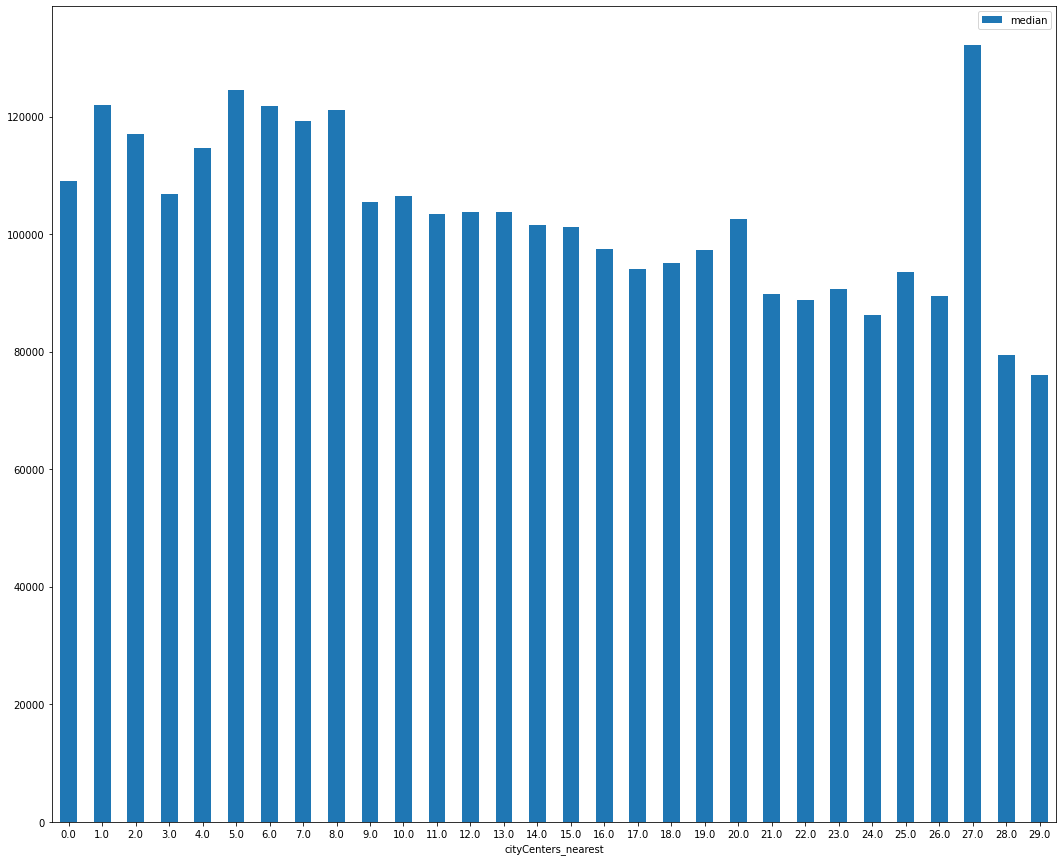

In [43]:
#5
location_SPB = data.query('locality_name == "Санкт-Петербург"')
ww = location_SPB.pivot_table(index = 'cityCenters_nearest', values = 'price_meter', aggfunc = {'mean', 'median'})
print(ww.head(10))
#ww.plot(y = 'median', kind = 'scatter', grid = True)
ww.plot.bar(y='median', rot=0, figsize = (18, 15))

Стоимость квартиры в диапазоне 8 км значительно выше тех кто находиться дальше и также очень интересно что на 26 км от центра цены резко ростут скорее всего это Питерская рублевка

### Общий вывод

Открыв файл мы сразу проверили общую информацию по данных и просмотрели тип данных, после чего сразу приступили к исправлению типа данных такие как даты. Также убрали в некоторых столбцах путсые значения и также значение равные нулю. Добавили новые необходимые столцы и также перевели метры в километры. 
После чего перешли к анализу. Нашли положительную кореляцию цен с площадью квартиры только до 400 кв метров также начниная от 1 комнаты до 7 цена ростет что и следоволо ожидать но если посмотрим на недвижимости у которых комнат больше 7 то цены очень сильно вариируются из чего можем сделать вывод что свыше 7 комнат уже другие факторы реагируют на цену и также пришли к выводу что площадь кухни зависит на цену
Проверили корреляцию с ценой и также нашли среднее и медиану по выбранным столбцам
Пришли также к выводу что последний этаж оказывается самым дорогим ,на втором месте стоит квартиры которые находяться на первом этаже и остальные
срдней срок сколько дней объявление висит на сайте составляет 74 дня и среднем 104 дня. 
Самая дорогая цена за квадратный метр в городе Санкт-Петербург и с не большим отстованием идет город Пушкин и последние место из топ-10 городов занимает город Выборг со средней ценой 58158 рублей за квадратный метр 
Касательно города Санкт-Петербург, стоимость квартиры в диапазоне 8 км значительно выше тех кто находиться дальше и также очень интересно что на 26 км от центра цены резко ростут скорее всего это Питерская рублевка